In [1]:
# DATA VISUALIZATION
# Import thirdnotebook:
%run 3notebook.ipynb

# Import dependencies:
import matplotlib.pyplot as plt
import scipy.stats as st

{'meta': {'code': 200},
 'response': {'holidays': [{'country': {'id': 'ca', 'name': 'Canada'},
                            'date': {'datetime': {'day': 1,
                                                  'month': 1,
                                                  'year': 2010},
                                     'iso': '2010-01-01'},
                            'description': "New Year's Day is the first day of "
                                           'a new year according to the '
                                           'Gregorian calendar used in Canada '
                                           'and many other countries.',
                            'locations': 'All',
                            'name': "New Year's Day",
                            'states': 'All',
                            'type': ['National holiday']},
                           {'country': {'id': 'ca', 'name': 'Canada'},
                            'date': {'datetime': {'day': 2,
               

                            'name': 'Memorial Day',
                            'states': [{'abbrev': 'NL',
                                        'exception': None,
                                        'id': 61,
                                        'iso': 'ca-nl',
                                        'name': 'Newfoundland and Labrador'}],
                            'type': ['Local holiday']},
                           {'country': {'id': 'ca', 'name': 'Canada'},
                            'date': {'datetime': {'day': 9,
                                                  'month': 7,
                                                  'year': 2010},
                                     'iso': '2010-07-09'},
                            'description': "Isra and Mi'raj (Isra Me'raj, "
                                           "Israa and Mi'raaj, Laylat Al-Isra "
                                           'wa Al-Miraj, Lailat al Miraj, '
                                           

                                        'name': 'Ontario'}],
                            'type': ['National holiday']},
                           {'country': {'id': 'ca', 'name': 'Canada'},
                            'date': {'datetime': {'day': 26,
                                                  'month': 12,
                                                  'year': 2010},
                                     'iso': '2010-12-26'},
                            'description': 'The day after Christmas Day is '
                                           'known as Boxing Day and is a '
                                           'holiday in many parts of Canada.',
                            'locations': 'AB',
                            'name': 'Boxing Day',
                            'states': [{'abbrev': 'AB',
                                        'exception': None,
                                        'id': 57,
                                        'iso': 'ca-ab',
            

In [2]:
# Read in various tables and dataframes:
# data = pd.read_csv("Dataset/final_df.csv")
data = walmart_holiday

# total_percent = pd.read_csv("Dataset/total_percent.csv")
total_percent = walmart_ttl.data

# holi_sum = pd.read_csv("Dataset/summary_holiday.csv")
holi_sum = holiday_summary.data

# unrate_ave = pd.read_csv("Dataset/rate_avg_holiday.csv")
unrate_ave = rate_holiday.data

# temp_ave = pd.read_csv("Dataset/temp_avg_is.csv")
temp_ave = temp_is.data

# unrate_avg = pd.read_csv("Dataset/rate_avg.csv")
unrate_avg = rate.data

# temp_total = pd.read_csv("Dataset/temp_ttl.csv")
temp_total = temp_ttl.data

# rate_total = pd.read_csv("Dataset/rate_ttl.csv")
rate_total = rate_ttl.data

# Read dataframe of weekly sales against week and year
weeksales = pd.read_csv("Weekly Sales.csv")

In [3]:
# Convert formatted dataframe to float:
holi_sum["Weekly_Sales"] = holi_sum["Weekly_Sales"].replace('[\$,]', '', regex=True).astype(float)
unrate_ave["Weekly_Sales"] = unrate_ave["Weekly_Sales"].replace('[\$,]', '', regex=True).astype(float)
temp_ave["Weekly_Sales"] = temp_ave["Weekly_Sales"].replace('[\$,]', '', regex=True).astype(float)
unrate_avg["Weekly_Sales"] = unrate_avg["Weekly_Sales"].replace('[\$,]', '', regex=True).astype(float)
temp_total["Weekly_Sales"] = temp_total["Weekly_Sales"].replace('[\$,]', '', regex=True).astype(float)
rate_total["Weekly_Sales"] = rate_total["Weekly_Sales"].replace('[\$,]', '', regex=True).astype(float)

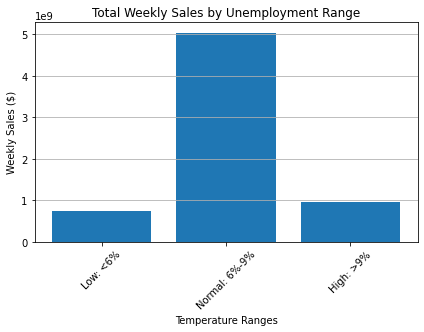

In [4]:
# BAR GRAPH: TOTAL WEEKLY SALES vs. UNEMPLOYMENT RANGE
total_sales = rate_total["Weekly_Sales"]
rate_categories = rate_total.index
plt.bar(rate_categories, total_sales)

# Label Axis and Title:
plt.title("Total Weekly Sales by Unemployment Range")
plt.xlabel("Temperature Ranges")
plt.ylabel("Weekly Sales ($)")

# Format:
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(axis="y")

# Export as png
plt.savefig("Figures/Unemployment/fig1.png")

# Show plot
plt.show()

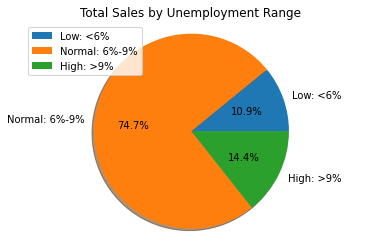

In [5]:
# PIE CHART: TOTAL SALES vs. UNEMPLOYMENT CATEGORY
total_sales = rate_total["Weekly_Sales"]
rate_categories = rate_total.index
explode = (0,1)

# Add titles and format:
plt.title("Total Sales by Unemployment Range")
plt.pie(total_sales, labels = rate_categories, shadow = True,autopct='%1.1f%%')
plt.legend()
plt.axis("equal")

# Export as png:
plt.savefig("Figures/Unemployment/fig2.png")

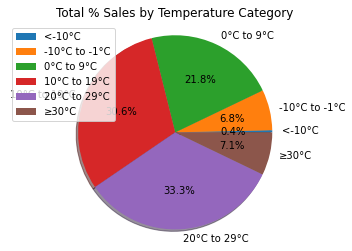

In [6]:
# PIE CHART: TOTAL SALES vs. TEMP CATEGORY
total_sales = temp_total["Weekly_Sales"]
temp_categories = temp_total.index
explode = (0,1)

# Add titles and format:
plt.title("Total % Sales by Temperature Category")
plt.pie(total_sales, labels=temp_categories,shadow = True,autopct='%1.1f%%')
plt.legend()
plt.axis("equal")

# Export as png:
plt.savefig("Figures/Temperature/fig3.png")

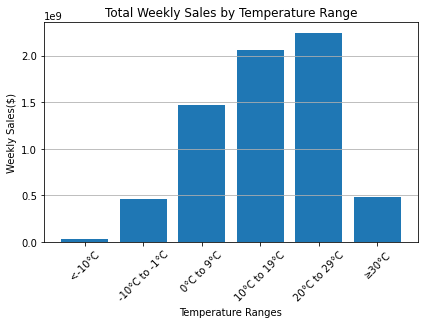

In [7]:
# BAR GRAPH: TOTAL WEEKLY SALES vs. TEMPERATURE CATEGORY
total_sales = temp_total["Weekly_Sales"]
temp_categories = temp_total.index
plt.bar(temp_categories, total_sales)

# Add titles and labels:
plt.title("Total Weekly Sales by Temperature Range")
plt.xlabel("Temperature Ranges")
plt.ylabel("Weekly Sales($)")

# Format:
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(axis="y")

# Export as png:
plt.savefig("Figures/Temperature/fig4.png")


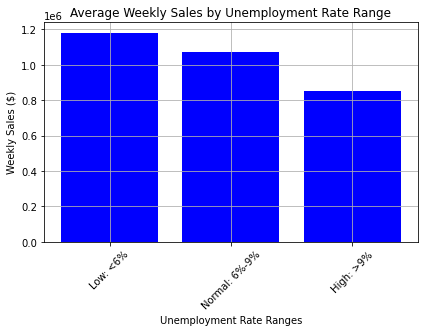

In [8]:
# BAR GRAPH: AVERAGE WEEKLY SALES vs. UNEMPLOYMENT RATE
weekly_sales = unrate_avg["Weekly_Sales"]
unemp_categories = unrate_avg.index

# Add title and labels:
plt.title("Average Weekly Sales by Unemployment Rate Range")
plt.bar(unemp_categories, weekly_sales, color="blue")
plt.xlabel("Unemployment Rate Ranges")
plt.ylabel("Weekly Sales ($)")

# Format:
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid()

# Export as png and show plot:
plt.savefig("Figures/Unemployment/fig5.png")
plt.show()

In [9]:
# Subset dataframe into no holiday and holiday:
regular_sales_total = data.loc[data["Is Holiday"]=="No Holiday"]["Weekly_Sales"].sum()
holiday_sales_total = data.loc[data["Is Holiday"]=="Holiday"]["Weekly_Sales"].sum()

# Set columns in separate variables:
weekly_sales = data["Weekly_Sales"]
ave_temperature = data["Temperature C"]
ave_fuel_price = data["Fuel_Price"]
un_rate = data["Unemployment"]
cpi = data["CPI"]
store_number = data["Store"]

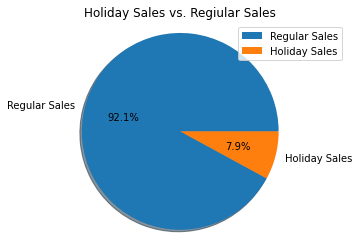

In [10]:
# PIE CHART: TOTAL HOLIDAY vs. NO HOLIDAY SALES
regular_sales_total
holiday_sales_total

types = ["Regular Sales","Holiday Sales"]
sales = [regular_sales_total, holiday_sales_total]
explode = (0,1)

# Add title:
plt.title("Holiday Sales vs. Regiular Sales")
plt.pie(sales, labels = types, shadow = True,autopct='%1.1f%%')

# Format:
plt.legend()
plt.axis("equal")

# Export as png:
plt.savefig("Figures/fig6.png")

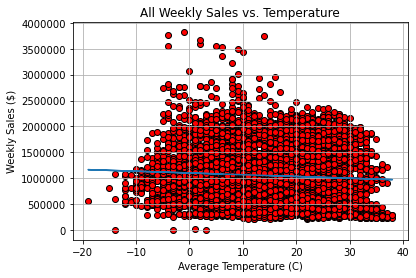

<Figure size 1440x720 with 0 Axes>

In [11]:
# SCATTER PLOT: AVERAGE TEMPERATURE vs. WEEKLY SALES
ave_temperature=data["Temperature C"]
weekly_sales=data["Weekly_Sales"]

# Add title and label:
plt.title("All Weekly Sales vs. Temperature")
plt.xlabel("Average Temperature (C)")
plt.ylabel("Weekly Sales ($)")

# Format:
plt.grid()
plt.scatter(ave_temperature, weekly_sales, marker="o", color = "red",edgecolors="black")
plt.ticklabel_format(style='plain')

# Create linear regression equation:
slope, intercept, r_value, p_value, std_err = st.linregress(ave_temperature, weekly_sales)
best_fit = slope*ave_temperature+intercept

# Plot and add linear regression equation:
plt.plot(ave_temperature,best_fit)
plt.figure(figsize=(20,10)) 
plt.tight_layout()

# Export as png:
plt.savefig("Figures/Temperature/fig7.png")

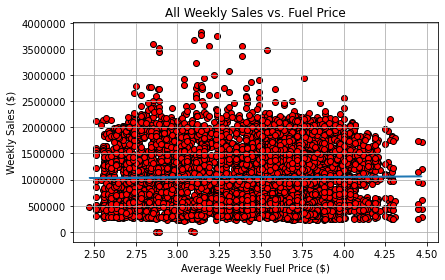

In [12]:
# SCATTER PLOT: FUEL PRICE vs. WEEKLY SALES
ave_fuel_price = data["Fuel_Price"]
weekly_sales=data["Weekly_Sales"]

# Add title and labels:
plt.title("All Weekly Sales vs. Fuel Price")
plt.xlabel("Average Weekly Fuel Price ($)")
plt.ylabel("Weekly Sales ($)")

# Format:
plt.tight_layout()
plt.grid()
plt.scatter(ave_fuel_price, weekly_sales, marker="o", color="red",edgecolors="black")
plt.ticklabel_format(style='plain')

# Create linear regression equation:
slope, intercept, r_value, p_value, std_err = st.linregress(ave_fuel_price, weekly_sales)
best_fit = slope*ave_fuel_price+intercept

# Plot and add linear regression equation:
plt.plot(ave_fuel_price,best_fit)

# Export as png:
plt.savefig("Figures/Fuel Price/fig8.png")

In [13]:
# Reset index:
unrateave = unrate_ave.reset_index(drop=False)

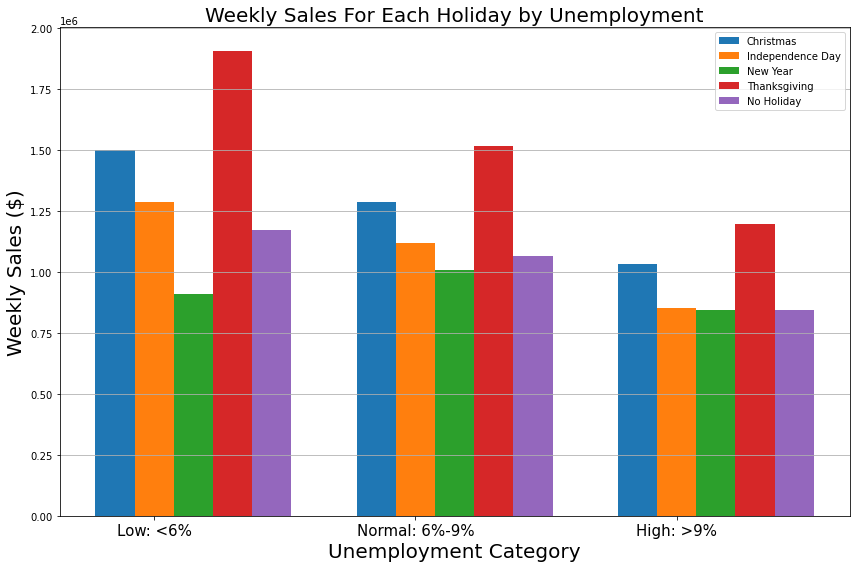

In [14]:
# GROUPED BAR GRAPH: AVERAGE WEEKLY SALES FOR EACH HOLIDAY vs. UNEMPLOYMENT CATEGORY

# Create bar graph and adding graphs together:
bar_width = 0.15
fig, ax = plt.subplots(figsize=(12, 8))
r1 = np.arange(len(unrateave["Unemployment Category"].unique()))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
b1 = plt.bar(r1, unrateave.loc[unrateave["Holiday Name"] == 'Christmas', 'Weekly_Sales'],width=bar_width, label="Christmas")
b2 = plt.bar(r2, unrateave.loc[unrateave["Holiday Name"] == 'Independence Day', 'Weekly_Sales'],width=bar_width, label="Independence Day")
b3 = plt.bar(r3, unrateave.loc[unrateave["Holiday Name"] == "New Year's Day", 'Weekly_Sales'],width=bar_width, label = "New Year")
b4 = plt.bar(r4, unrateave.loc[unrateave["Holiday Name"] == 'Thanksgiving Day', 'Weekly_Sales'],width=bar_width, label = "Thanksgiving")
b3 = plt.bar(r5, unrateave.loc[unrateave["Holiday Name"] == 'No Holiday', 'Weekly_Sales'],width=bar_width, label = "No Holiday")

# Add title and labels:
plt.xticks([r + bar_width for r in range(len(unrateave["Unemployment Category"].unique()))], ['Low: <6%', 'Normal: 6%-9%', 'High: >9%'],fontsize=15)
plt.xlabel("Unemployment Rate Range")
plt.title("Weekly Sales For Each Holiday by Unemployment",fontsize=20)
plt.ylabel("Weekly Sales ($)",fontsize=20)
plt.xlabel("Unemployment Category",fontsize=20)

# Format:
ax.legend()
plt.tight_layout()
plt.grid(axis="y")

# Export as png:
plt.savefig("Figures/Unemployment/fig9.png")


In [15]:
# Reset index:
tempave = temp_ave.reset_index(drop=False)

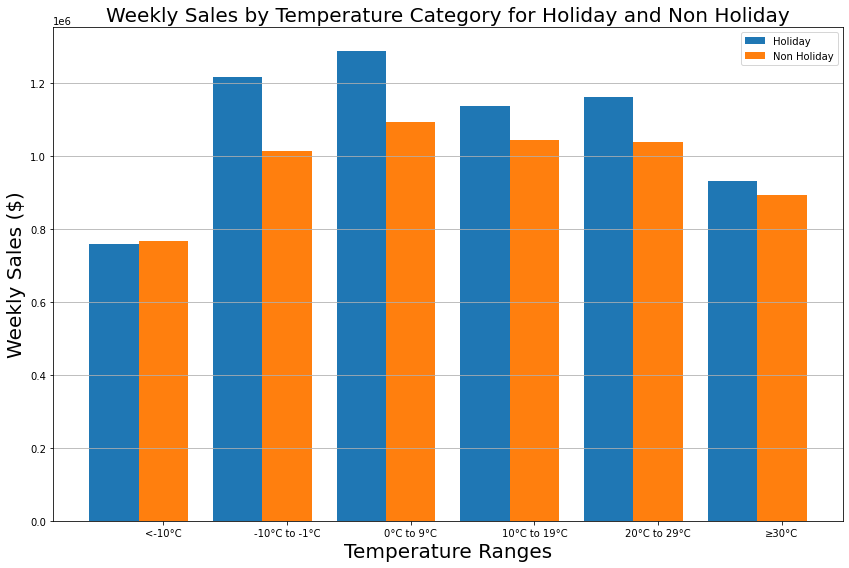

In [16]:
# GROUPED BAR GRAPH: WEEKLY SALES vs. TEMPERATURE CATEGORY FOR HOLIDAYS AND NON NOLIDAYS
# Create bar graph:
bar_width = 0.4
fig, ax = plt.subplots(figsize=(12, 8))
r1 = np.arange(len(tempave["Temp Category"].unique()))
r2 = [x + bar_width for x in r1]
b1 = ax.bar(r1, tempave.loc[tempave["Is Holiday"] == 'Holiday', 'Weekly_Sales'],width=bar_width, label="Holiday")
b2 = ax.bar(r2, tempave.loc[tempave["Is Holiday"] == 'No Holiday', 'Weekly_Sales'],width=bar_width, label="Non Holiday")

# Add title and labels:
plt.xticks([r + bar_width for r in range(len(tempave["Temp Category"].unique()))], ["<-10°C","-10°C to -1°C","0°C to 9°C","10°C to 19°C","20°C to 29°C","≥30°C"])
plt.xlabel("Temperature Ranges",fontsize=20)
plt.ylabel("Weekly Sales ($)",fontsize=20)
plt.title("Weekly Sales by Temperature Category for Holiday and Non Holiday",fontsize=20)

# Format:
ax.legend()
plt.tight_layout()
plt.grid(axis="y")

# Export as png:
plt.savefig("Figures/Temperature/fig10.png")

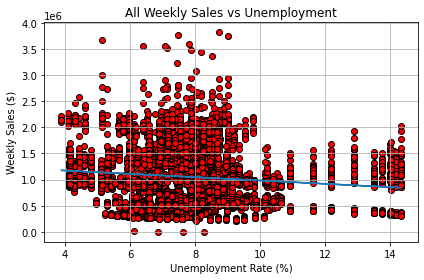

In [17]:
# SCATTERPLOT: ALL WEEKLY SALES vs. UNEMPLOYMENT RATE
weekly_sales = data["Weekly_Sales"]
un_rate = data["Unemployment"]

# Add title and labels:
plt.title("All Weekly Sales vs Unemployment")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Weekly Sales ($)")
plt.scatter(un_rate, weekly_sales, marker="o", color="red", edgecolor="black")

# Create linear regression equation:
slope, intercept, r_value, p_value, std_err = st.linregress(un_rate, weekly_sales)
best_fit = slope*un_rate+intercept

# Plot and include linear regression equation:
plt.plot(un_rate,best_fit)
plt.grid()
plt.tight_layout()

# Export as png:
plt.savefig("Figures/Unemployment/fig11.png")

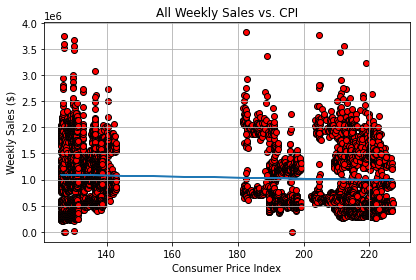

In [18]:
# SCATTERPOINT: ALL WEEKLY SALES vs. CPI
weekly_sales = data["Weekly_Sales"]
cpi = data["CPI"]

# Add title and labels:
plt.title("All Weekly Sales vs. CPI")
plt.ylabel("Weekly Sales ($)")
plt.xlabel("Consumer Price Index")

# Format:
plt.tight_layout()
plt.scatter(cpi,weekly_sales,marker="o", color="red",edgecolor="black")

# Create linear regression equation:
slope, intercept, r_value, p_value, std_err = st.linregress(cpi, weekly_sales)
best_fit = slope*cpi+intercept

# Plot and add equation to graph:
plt.plot(cpi,best_fit)
plt.grid()

# Export as png:
plt.savefig("Figures/CPI/fig12.png")

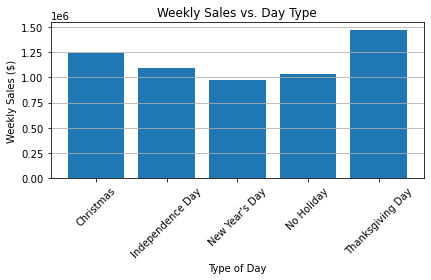

In [19]:
# BAR GRAPH: WEEKLY SALES vs. HOLIDAY
plt.bar(holi_sum.index,holi_sum["Weekly_Sales"])

# Add title and labels:
plt.xlabel("Type of Day")
plt.ylabel("Weekly Sales ($)")
plt.xticks(rotation=45)
plt.title("Weekly Sales vs. Day Type")

# Format:
plt.grid(axis="y")
plt.tight_layout()

# Export as png:
plt.savefig("Figures/fig13.png")

In [20]:
# Subset data:
holiday_data = data.loc[data["Is Holiday"] != "No Holiday"]

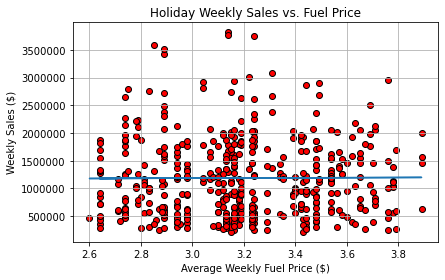

In [21]:
# SCATTERPLOT: HOLIDAY WEEKLY SALES vs, FUEL PRICE
ave_fuel_price = holiday_data["Fuel_Price"]
weekly_sales = holiday_data["Weekly_Sales"]

# Add title and labels:
plt.title("Holiday Weekly Sales vs. Fuel Price")
plt.xlabel("Average Weekly Fuel Price ($)")
plt.ylabel("Weekly Sales ($)")

# Format:
plt.tight_layout()
plt.grid()
plt.scatter(ave_fuel_price, weekly_sales, marker="o", color="red",edgecolors="black")
plt.ticklabel_format(style='plain')

# Create linear regression equation:
slope, intercept, r_value, p_value, std_err = st.linregress(ave_fuel_price, weekly_sales)
best_fit = slope*ave_fuel_price+intercept

# Plot and add equation:
plt.plot(ave_fuel_price,best_fit)

# Export as png:
plt.savefig("Figures/Fuel Price/fig14.png")

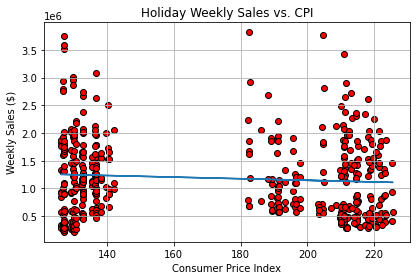

In [22]:
# SCATTERPLOT: HOLIDAY WEEKLY SALES vs. CPI
weekly_sales = holiday_data["Weekly_Sales"]
cpi = holiday_data["CPI"]

# Add title and labels:
plt.title("Holiday Weekly Sales vs. CPI")
plt.ylabel("Weekly Sales ($)")
plt.xlabel("Consumer Price Index")

# Format:
plt.tight_layout()
plt.scatter(cpi,weekly_sales,marker="o", color="red",edgecolor="black")

# Create equation:
slope, intercept, r_value, p_value, std_err = st.linregress(cpi, weekly_sales)
best_fit = slope*cpi+intercept

# Plot and add equation:
plt.plot(cpi,best_fit)
plt.grid()

# Export as png:
plt.savefig("Figures/CPI/fig15.png")

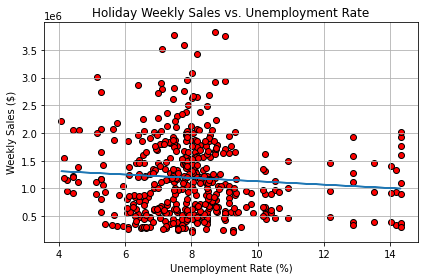

In [23]:
# SCATTERPLOT: HOLIDAY WEEKLY SALES vs. UNEMPLOYMENT RATE
weekly_sales = holiday_data["Weekly_Sales"]
un_rate = holiday_data["Unemployment"]

# Add title and labels:
plt.title("Holiday Weekly Sales vs. Unemployment Rate")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Weekly Sales ($)")

# Plot and create linear regression:
plt.scatter(un_rate, weekly_sales, marker="o", color="red", edgecolor="black")
slope, intercept, r_value, p_value, std_err = st.linregress(un_rate, weekly_sales)
best_fit = slope*un_rate+intercept
plt.plot(un_rate,best_fit)

# Format:
plt.grid()
plt.tight_layout()

# Export as png:
plt.savefig("Figures/Unemployment/fig16.png")

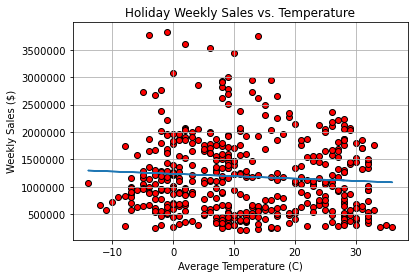

<Figure size 1440x720 with 0 Axes>

In [24]:
# SCATTERPLOT: HOLIDAY WEEKLY SALES vs. AVERAGE TEMPERATURE

weekly_sales = holiday_data["Weekly_Sales"]
ave_temperature = holiday_data["Temperature C"]

# Add title and labels:
plt.title("Holiday Weekly Sales vs. Temperature")
plt.xlabel("Average Temperature (C)")
plt.ylabel("Weekly Sales ($)")

plt.grid()
plt.scatter(ave_temperature, weekly_sales, marker="o", color = "red",edgecolors="black")
plt.ticklabel_format(style='plain')

# Create linear regression equation:
slope, intercept, r_value, p_value, std_err = st.linregress(ave_temperature, weekly_sales)
best_fit = slope*ave_temperature+intercept

# Plot and add equation:
plt.plot(ave_temperature,best_fit)
plt.figure(figsize=(20,10))

# Export as png:
plt.savefig("Figures/Temperature/fig17.png")

<Figure size 432x288 with 0 Axes>

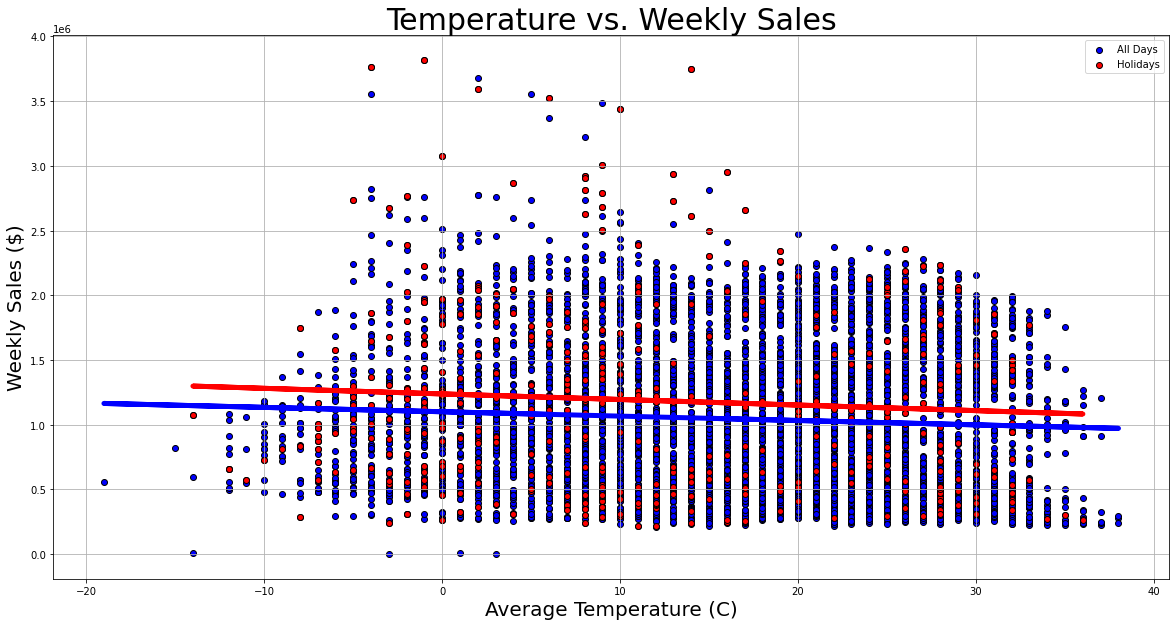

In [25]:
# SCATTERPLOT: ALL WEEKLY SALES vs. TEMPERATURE FOR HOLIDAY AND NON-HOLIDAY

ave_temperature1 = data["Temperature C"]
weekly_sales1 = data["Weekly_Sales"]
weekly_sales2 = data.loc[data["Is Holiday"] != "No Holiday"]["Weekly_Sales"]
ave_temperature2 = data.loc[data["Is Holiday"] != "No Holiday"]["Temperature C"]
plt.tight_layout()
plt.figure(figsize=(20,10)) 
plt.grid()

# Add title and labels:
plt.title("Temperature vs. Weekly Sales",fontsize=30)
plt.xlabel("Average Temperature (C)",fontsize=20)
plt.ylabel("Weekly Sales ($)",fontsize=20)

plt.scatter(ave_temperature1, weekly_sales1, marker="o", color = "blue",edgecolors="black",label="All Days")
plt.scatter(ave_temperature2, weekly_sales2, marker="o", color = "red",edgecolors="black",label = "Holidays")

# Create linear regression equation, plot and add equation:
slope2, intercept2, r_value2, p_value2, std_err2 = st.linregress(ave_temperature2, weekly_sales2)
best_fit2 = slope2*ave_temperature2+intercept2
slope1, intercept1, r_value1, p_value1, std_err1 = st.linregress(ave_temperature1, weekly_sales1)
best_fit1 = slope1*ave_temperature1+intercept1

plt.plot(ave_temperature1,best_fit1,linewidth=5,c="blue")
plt.plot(ave_temperature2,best_fit2,linewidth=5,c="red")
plt.legend()

# Export as png:
plt.savefig("Figures/Temperature/fig18.png")

<Figure size 432x288 with 0 Axes>

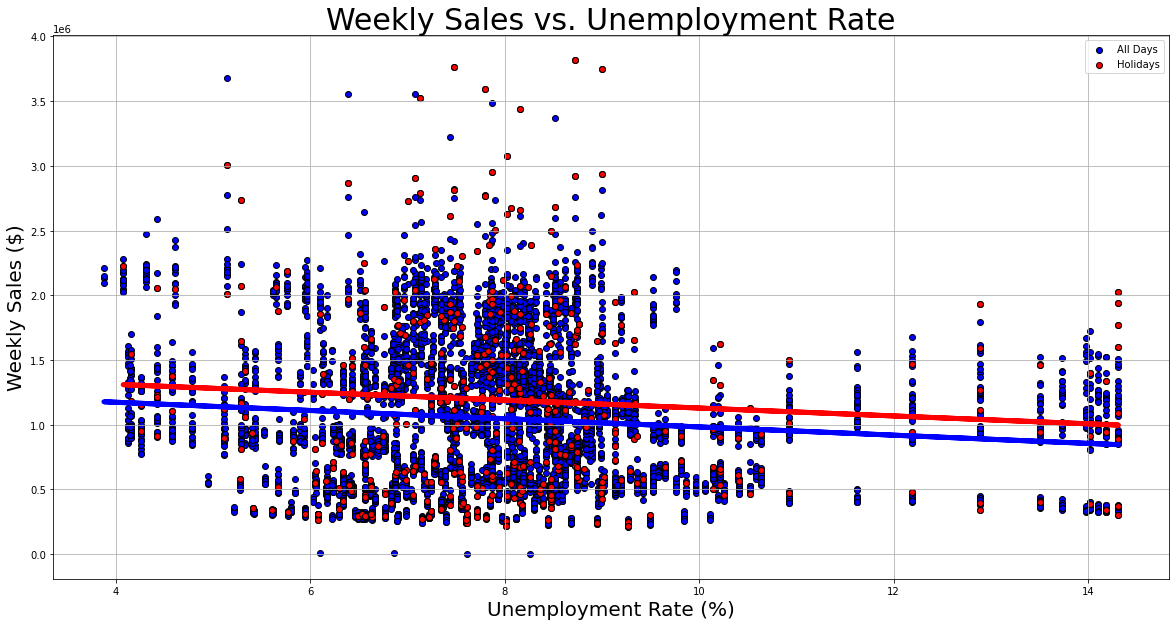

In [26]:
# SCATTERPLOT: ALL WEEKLY SALES vs. UNEMPLOYMENT RATE FOR HOLIDAY AND NON-HOLIDAY

un_rate1 = data["Unemployment"]
weekly_sales1 = data["Weekly_Sales"]
weekly_sales2 = data.loc[data["Is Holiday"] != "No Holiday"]["Weekly_Sales"]
un_rate2 = data.loc[data["Is Holiday"] != "No Holiday"]["Unemployment"]

# Format:
plt.tight_layout()
plt.figure(figsize=(20,10)) 
plt.grid()

# Add title and labels:
plt.title("Weekly Sales vs. Unemployment Rate",fontsize=30)
plt.xlabel("Unemployment Rate (%)",fontsize=20)
plt.ylabel("Weekly Sales ($)",fontsize=20)

plt.scatter(un_rate1, weekly_sales1, marker="o", color = "blue",edgecolors="black",label="All Days")
plt.scatter(un_rate2, weekly_sales2, marker="o", color = "red",edgecolors="black",label = "Holidays")

# Create linear regression, plot and add equation:
slope2, intercept2, r_value2, p_value2, std_err2 = st.linregress(un_rate2, weekly_sales2)
best_fit2 = slope2*un_rate2+intercept2
slope1, intercept1, r_value1, p_value1, std_err1 = st.linregress(un_rate1, weekly_sales1)
best_fit1 = slope1*un_rate1+intercept1

plt.plot(un_rate1,best_fit1,linewidth=5,c="blue")
plt.plot(un_rate2,best_fit2,linewidth=5,c="red")
plt.legend()

# Export as png:
plt.savefig("Figures/Unemployment/fig19.png")

<Figure size 432x288 with 0 Axes>

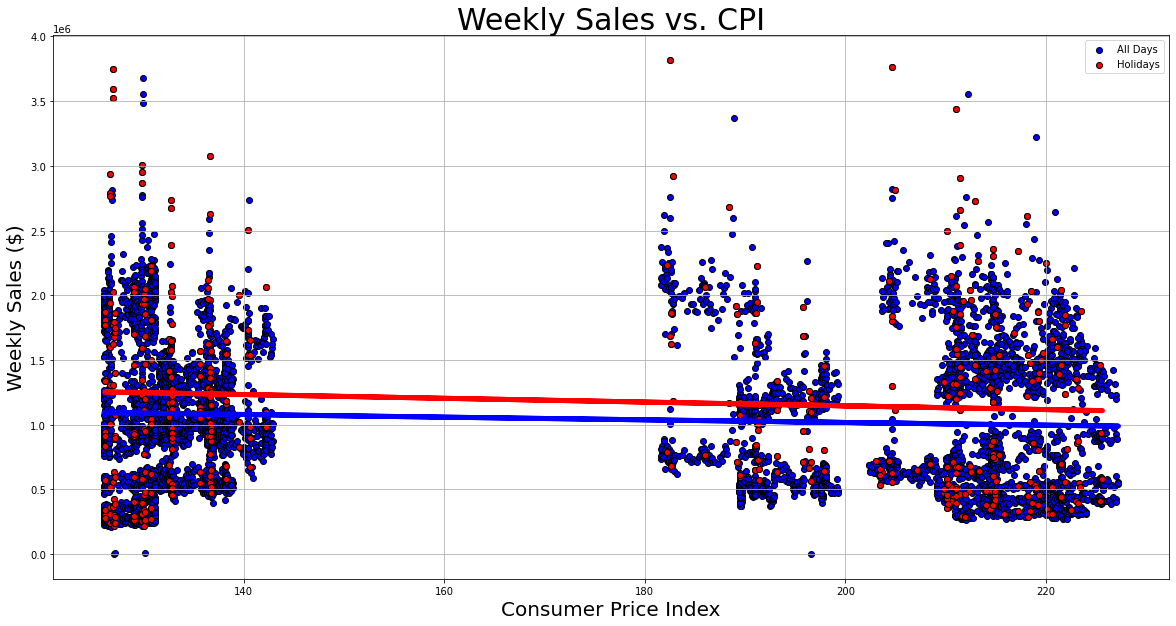

In [27]:
# SCATTERPLOT: ALL WEEKLY SALES vs. CPI FOR HOLIDAY AND NON-HOLIDAY

cpi1 = data["CPI"]
weekly_sales1 = data["Weekly_Sales"]
weekly_sales2 = data.loc[data["Is Holiday"] != "No Holiday"]["Weekly_Sales"]
cpi2 = data.loc[data["Is Holiday"] != "No Holiday"]["CPI"]

# Format:
plt.tight_layout()
plt.figure(figsize=(20,10)) 
plt.grid()

# Add title and labels:
plt.title("Weekly Sales vs. CPI",fontsize = 30)
plt.xlabel("Consumer Price Index",fontsize=20)
plt.ylabel("Weekly Sales ($)",fontsize = 20)

plt.scatter(cpi1, weekly_sales1, marker="o", color = "blue",edgecolors="black",label="All Days")
plt.scatter(cpi2, weekly_sales2, marker="o", color = "red",edgecolors="black",label = "Holidays")

# Create linear regression equation, plot and add equation:
slope2, intercept2, r_value2, p_value2, std_err2 = st.linregress(cpi2, weekly_sales2)
best_fit2 = slope2*cpi2+intercept2
slope1, intercept1, r_value1, p_value1, std_err1 = st.linregress(cpi1, weekly_sales1)
best_fit1 = slope1*cpi1+intercept1

plt.plot(cpi1,best_fit1,linewidth=5,c="blue")
plt.plot(cpi2,best_fit2,linewidth=5,c="red")
plt.legend()

# Export as png:
plt.savefig("Figures/CPI/fig20.png")

<Figure size 432x288 with 0 Axes>

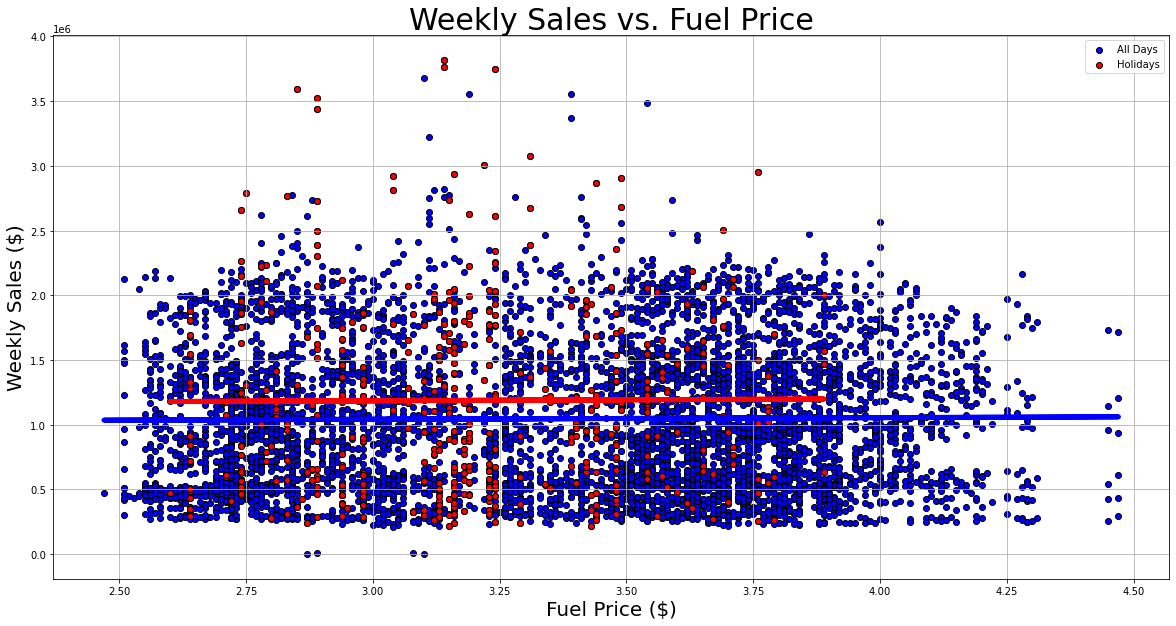

In [28]:
#SCATTERPLOT: ALL WEEKLY SALES vs. CPI FOR HOLIDAY AND NON-HOLIDAY

fuel1 = data["Fuel_Price"]
weekly_sales1 = data["Weekly_Sales"]
weekly_sales2 = data.loc[data["Is Holiday"] != "No Holiday"]["Weekly_Sales"]
fuel2 = data.loc[data["Is Holiday"] != "No Holiday"]["Fuel_Price"]

# Format:
plt.tight_layout()
plt.figure(figsize=(20,10)) 
plt.grid()

# Add title and labels:
plt.title("Weekly Sales vs. Fuel Price",fontsize=30)
plt.xlabel("Fuel Price ($)",fontsize=20)
plt.ylabel("Weekly Sales ($)",fontsize = 20)

plt.scatter(fuel1, weekly_sales1, marker="o", color = "blue",edgecolors="black",label="All Days")
plt.scatter(fuel2, weekly_sales2, marker="o", color = "red",edgecolors="black",label = "Holidays")

# Create linear regression equation, plot and add equation:
slope2, intercept2, r_value2, p_value2, std_err2 = st.linregress(fuel2, weekly_sales2)
best_fit2 = slope2*fuel2+intercept2
slope1, intercept1, r_value1, p_value1, std_err1 = st.linregress(fuel1, weekly_sales1)
best_fit1 = slope1*fuel1+intercept1

plt.plot(fuel1,best_fit1,linewidth=5,c="blue")
plt.plot(fuel2,best_fit2,linewidth=5,c="red")
plt.legend()

# Export as png:
plt.savefig("Figures/Fuel Price/fig21.png")

In [29]:
# Separate years into different variables
weeksales
tensales = weeksales.loc[weeksales["Year"]==2010]
elevensales = weeksales.loc[weeksales["Year"]==2011]
twelvesales = weeksales.loc[weeksales["Year"]==2012]

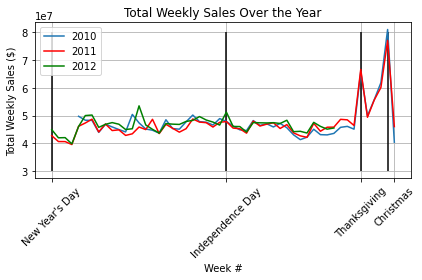

In [30]:
# LINEGRAPH: TOTAL WEEKLY SALES vs WEEKS (YEARLY)
# Groupby week, sum Weekly Sales:
ten = tensales.groupby("Week")["Weekly_Sales"].sum()
eleven = elevensales.groupby("Week")["Weekly_Sales"].sum()
twelve = twelvesales.groupby("Week")["Weekly_Sales"].sum()
ten

# Set bin and labels:
ticks = [1,27,47,52]
labels = ["New Year's Day","Independence Day","Thanksgiving","Christmas"]

# Set title and labels:
plt.xticks(ticks = ticks,labels=labels,rotation=45)
plt.ylabel("Total Weekly Sales ($)")
plt.title("Total Weekly Sales Over the Year")
plt.xlabel("Week #")

plt.plot(ten,label="2010")
plt.plot(eleven, c="red",label="2011")
plt.plot(twelve,c="green",label="2012")

# Add vertical lines during the holidays to identify spikes:
plt.vlines(1,30000000,80000000)
plt.vlines(27,30000000,80000000)
plt.vlines(47,30000000,80000000)
plt.vlines(51,30000000,80000000)

# Format:
plt.tight_layout()
plt.legend()
plt.grid()

# Export as png:
plt.savefig("Figures/fig22.png")

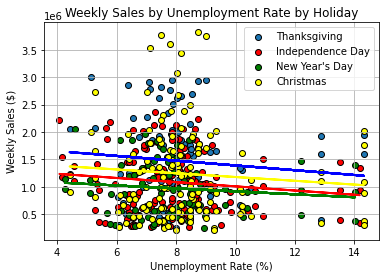

In [31]:
# SCATTERPLOT: HOLIDAYS vs. UNEMPLOYMENT RATE
thanks = data.loc[data["Holiday Name"]=="Thanksgiving Day"]
indep = data.loc[data["Holiday Name"]=="Independence Day"]
nyd = data.loc[data["Holiday Name"]=="New Year's Day"]
xmas= data.loc[data["Holiday Name"]=="Christmas"]

plt.scatter(thanks["Unemployment"],thanks["Weekly_Sales"],edgecolor="black", label="Thanksgiving")
plt.scatter(indep["Unemployment"],indep["Weekly_Sales"],c="red",edgecolor="black",label="Independence Day")
plt.scatter(nyd["Unemployment"],nyd["Weekly_Sales"],c="green",edgecolor="black",label="New Year's Day")
plt.scatter(xmas["Unemployment"],xmas["Weekly_Sales"],c="yellow",edgecolor="black",label="Christmas")

# Create linear regression equations:
slopet, interceptt, r_valuet, p_valuet, std_errt = st.linregress(thanks["Unemployment"], thanks["Weekly_Sales"])
best_fitt = slopet*thanks["Unemployment"]+interceptt
plt.plot(thanks["Unemployment"],best_fitt,linewidth=2,c="blue")
slopei, intercepti, r_valuei, p_valuei, std_erri = st.linregress(indep["Unemployment"], indep["Weekly_Sales"])
best_fiti = slopei*indep["Unemployment"]+intercepti
plt.plot(indep["Unemployment"],best_fiti,linewidth=2,c="red")
slopen, interceptn, r_valuen, p_valuen, std_errn = st.linregress(nyd["Unemployment"], nyd["Weekly_Sales"])
best_fitn = slopen*nyd["Unemployment"]+interceptn
plt.plot(nyd["Unemployment"],best_fitn,linewidth=2,c="green")
slopex, interceptx, r_valuex, p_valuex, std_errx = st.linregress(xmas["Unemployment"], xmas["Weekly_Sales"])
best_fitx = slopex*xmas["Unemployment"]+interceptx

# Format and add labels:
plt.plot(xmas["Unemployment"],best_fitx,linewidth=2,c="yellow")
plt.legend()
plt.title("Weekly Sales by Unemployment Rate by Holiday")
plt.ylabel("Weekly Sales ($)")
plt.xlabel("Unemployment Rate (%)")
plt.grid()
plt.tight_layout

# Export as png:
plt.savefig("Figures/Unemployment/fig23.png")

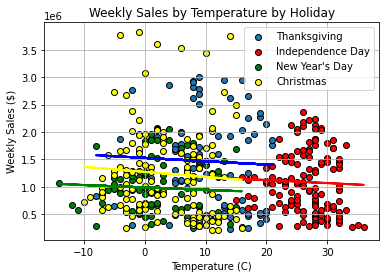

In [32]:
# SCATTERPLOT: HOLIDAYS vs. TEMPERATURE
thanks = data.loc[data["Holiday Name"]=="Thanksgiving Day"]
indep = data.loc[data["Holiday Name"]=="Independence Day"]
nyd = data.loc[data["Holiday Name"]=="New Year's Day"]
xmas= data.loc[data["Holiday Name"]=="Christmas"]

plt.scatter(thanks["Temperature C"],thanks["Weekly_Sales"],edgecolor="black", label="Thanksgiving")
plt.scatter(indep["Temperature C"],indep["Weekly_Sales"],c="red",edgecolor="black",label="Independence Day")
plt.scatter(nyd["Temperature C"],nyd["Weekly_Sales"],c="green",edgecolor="black",label="New Year's Day")
plt.scatter(xmas["Temperature C"],xmas["Weekly_Sales"],c="yellow",edgecolor="black",label="Christmas")

# Create linear regression equation:
slopet, interceptt, r_valuet, p_valuet, std_errt = st.linregress(thanks["Temperature C"], thanks["Weekly_Sales"])
best_fitt = slopet*thanks["Temperature C"]+interceptt
plt.plot(thanks["Temperature C"],best_fitt,linewidth=2,c="blue")
slopei, intercepti, r_valuei, p_valuei, std_erri = st.linregress(indep["Temperature C"], indep["Weekly_Sales"])
best_fiti = slopei*indep["Temperature C"]+intercepti
plt.plot(indep["Temperature C"],best_fiti,linewidth=2,c="red")
slopen, interceptn, r_valuen, p_valuen, std_errn = st.linregress(nyd["Temperature C"], nyd["Weekly_Sales"])
best_fitn = slopen*nyd["Temperature C"]+interceptn
plt.plot(nyd["Temperature C"],best_fitn,linewidth=2,c="green")
slopex, interceptx, r_valuex, p_valuex, std_errx = st.linregress(xmas["Temperature C"], xmas["Weekly_Sales"])
best_fitx = slopex*xmas["Temperature C"]+interceptx

# Format and add labels:
plt.plot(xmas["Temperature C"],best_fitx,linewidth=2,c="yellow")
plt.legend()
plt.title("Weekly Sales by Temperature by Holiday")
plt.ylabel("Weekly Sales ($)")
plt.xlabel("Temperature (C)")
plt.grid()
plt.tight_layout

# Export as png:
plt.savefig("Figures/Temperature/fig24.png")

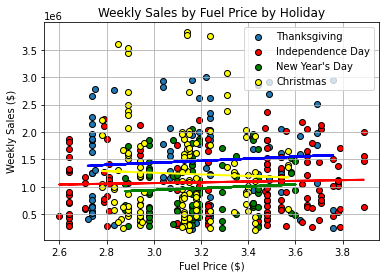

In [33]:
# SCATTERPLOT: HOLIDAYS vs. FUEL PRICE
thanks = data.loc[data["Holiday Name"]=="Thanksgiving Day"]
indep = data.loc[data["Holiday Name"]=="Independence Day"]
nyd = data.loc[data["Holiday Name"]=="New Year's Day"]
xmas= data.loc[data["Holiday Name"]=="Christmas"]

plt.scatter(thanks["Fuel_Price"],thanks["Weekly_Sales"],edgecolor="black", label="Thanksgiving")
plt.scatter(indep["Fuel_Price"],indep["Weekly_Sales"],c="red",edgecolor="black",label="Independence Day")
plt.scatter(nyd["Fuel_Price"],nyd["Weekly_Sales"],c="green",edgecolor="black",label="New Year's Day")
plt.scatter(xmas["Fuel_Price"],xmas["Weekly_Sales"],c="yellow",edgecolor="black",label="Christmas")
slopet, interceptt, r_valuet, p_valuet, std_errt = st.linregress(thanks["Fuel_Price"], thanks["Weekly_Sales"])

# Create linear regression lines:
best_fitt = slopet*thanks["Fuel_Price"]+interceptt
plt.plot(thanks["Fuel_Price"],best_fitt,linewidth=2,c="blue")
slopei, intercepti, r_valuei, p_valuei, std_erri = st.linregress(indep["Fuel_Price"], indep["Weekly_Sales"])
best_fiti = slopei*indep["Fuel_Price"]+intercepti
plt.plot(indep["Fuel_Price"],best_fiti,linewidth=2,c="red")
slopen, interceptn, r_valuen, p_valuen, std_errn = st.linregress(nyd["Fuel_Price"], nyd["Weekly_Sales"])
best_fitn = slopen*nyd["Fuel_Price"]+interceptn
plt.plot(nyd["Fuel_Price"],best_fitn,linewidth=2,c="green")
slopex, interceptx, r_valuex, p_valuex, std_errx = st.linregress(xmas["Fuel_Price"], xmas["Weekly_Sales"])
best_fitx = slopex*xmas["Fuel_Price"]+interceptx

# Format and add labels:
plt.plot(xmas["Fuel_Price"],best_fitx,linewidth=2,c="yellow")
plt.legend()
plt.title("Weekly Sales by Fuel Price by Holiday")
plt.ylabel("Weekly Sales ($)")
plt.xlabel("Fuel Price ($)")
plt.grid()
plt.tight_layout

# Export as png:
plt.savefig("Figures/Fuel Price/fig25.png")

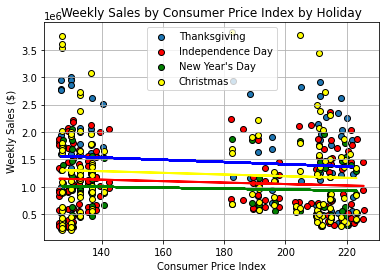

In [34]:
# SCATTERPLOT: HOLIDAYS vs. CPI
thanks = data.loc[data["Holiday Name"]=="Thanksgiving Day"]
indep = data.loc[data["Holiday Name"]=="Independence Day"]
nyd = data.loc[data["Holiday Name"]=="New Year's Day"]
xmas= data.loc[data["Holiday Name"]=="Christmas"]

plt.scatter(thanks["CPI"],thanks["Weekly_Sales"],edgecolor="black", label="Thanksgiving")
plt.scatter(indep["CPI"],indep["Weekly_Sales"],c="red",edgecolor="black",label="Independence Day")
plt.scatter(nyd["CPI"],nyd["Weekly_Sales"],c="green",edgecolor="black",label="New Year's Day")
plt.scatter(xmas["CPI"],xmas["Weekly_Sales"],c="yellow",edgecolor="black",label="Christmas")

# Create linear regression lines:
slopet, interceptt, r_valuet, p_valuet, std_errt = st.linregress(thanks["CPI"], thanks["Weekly_Sales"])
best_fitt = slopet*thanks["CPI"]+interceptt
plt.plot(thanks["CPI"],best_fitt,linewidth=2,c="blue")
slopei, intercepti, r_valuei, p_valuei, std_erri = st.linregress(indep["CPI"], indep["Weekly_Sales"])
best_fiti = slopei*indep["CPI"]+intercepti
plt.plot(indep["CPI"],best_fiti,linewidth=2,c="red")
slopen, interceptn, r_valuen, p_valuen, std_errn = st.linregress(nyd["CPI"], nyd["Weekly_Sales"])
best_fitn = slopen*nyd["CPI"]+interceptn
plt.plot(nyd["CPI"],best_fitn,linewidth=2,c="green")
slopex, interceptx, r_valuex, p_valuex, std_errx = st.linregress(xmas["CPI"], xmas["Weekly_Sales"])
best_fitx = slopex*xmas["CPI"]+interceptx

# Format and add labels:
plt.plot(xmas["CPI"],best_fitx,linewidth=2,c="yellow")
plt.legend()
plt.title("Weekly Sales by Consumer Price Index by Holiday")
plt.ylabel("Weekly Sales ($)")
plt.xlabel("Consumer Price Index")
plt.grid()
plt.tight_layout

# Export as png:
plt.savefig("Figures/CPI/fig26.png")

In [35]:
# Groupby Date and determine average of variables:
datea = data.groupby("Date")["Weekly_Sales"].mean()
sales=pd.DataFrame(datea)
tempa = data.groupby("Date")["Temperature C"].mean()
temp=pd.DataFrame(tempa)
fuela = data.groupby("Date")["Fuel_Price"].mean()
cpia = data.groupby("Date")["CPI"].mean()
ratea = data.groupby("Date")["Unemployment"].mean()

# Merge dataframes:
merge = sales.merge(tempa,on="Date")
merged = merge.merge(fuela,on="Date")
merger = merged.merge(cpia,on="Date")
bydate = merger.merge(ratea,on="Date")

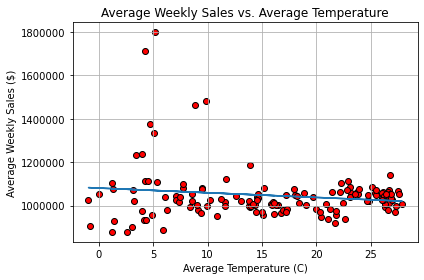

In [36]:
# SCATTERPLOT: AVERAGE WEEKLY SALES vs. AVERAGE TEMPERATURE FOR ALL DAYS
ave_temperature=merge["Temperature C"]
weekly_sales=merge["Weekly_Sales"]

# Format and add labels:
plt.title("Average Weekly Sales vs. Average Temperature")
plt.xlabel("Average Temperature (C)")
plt.ylabel("Average Weekly Sales ($)")
plt.grid()
plt.scatter(ave_temperature, weekly_sales, marker="o", color = "red",edgecolors="black")
plt.ticklabel_format(style='plain')

# Create linear regression equation:
slope, intercept, r_value, p_value, std_err = st.linregress(ave_temperature, weekly_sales)
best_fit = slope*ave_temperature+intercept
plt.plot(ave_temperature,best_fit)
plt.tight_layout()

# Export as png:
plt.savefig("Figures/Temperature/fig27.png")

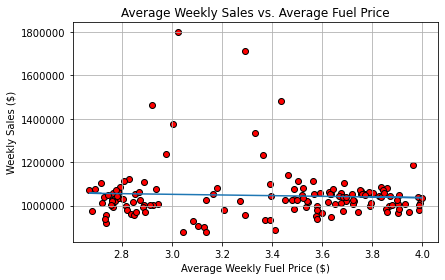

In [37]:
# SCATTERPLOT: AVERAGE WEEKLY SALES vs. AVERAGE FUEL PRICE FOR ALL DAYS
ave_fuel_price = merged["Fuel_Price"]
weekly_sales=merged["Weekly_Sales"]

# Format and add labels:
plt.title("Average Weekly Sales vs. Average Fuel Price")
plt.xlabel("Average Weekly Fuel Price ($)")
plt.ylabel("Weekly Sales ($)")
plt.tight_layout()
plt.grid()
plt.scatter(ave_fuel_price, weekly_sales, marker="o", color="red",edgecolors="black")
plt.ticklabel_format(style='plain')

# Create linear regression equations:
slope, intercept, r_value, p_value, std_err = st.linregress(ave_fuel_price, weekly_sales)
best_fit = slope*ave_fuel_price+intercept
plt.plot(ave_fuel_price,best_fit)

# Export as png:
plt.savefig("Figures/Fuel Price/fig28.png")

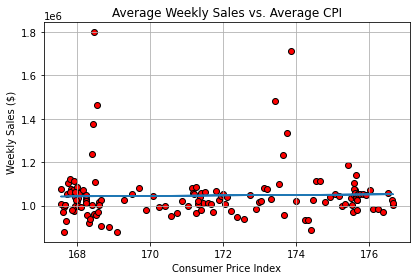

In [38]:
# SCATTERPLOT: AVERAGE WEEKLY SALES vs. AVERAGE CPI FOR ALL DAYS
weekly_sales = merger["Weekly_Sales"]
cpi = merger["CPI"]

# Format and add labels:
plt.title("Average Weekly Sales vs. Average CPI")
plt.ylabel("Weekly Sales ($)")
plt.xlabel("Consumer Price Index")
plt.tight_layout()
plt.scatter(cpi,weekly_sales,marker="o", color="red",edgecolor="black")

# Create linear regression equation:
slope, intercept, r_value, p_value, std_err = st.linregress(cpi, weekly_sales)
best_fit = slope*cpi+intercept
plt.plot(cpi,best_fit)
plt.grid()

# Export as png
plt.savefig("Figures/CPI/fig29.png")

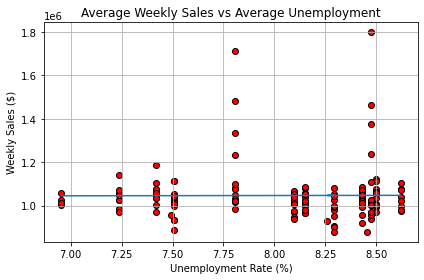

In [39]:
# SCATTERPLOT: AVERAGE UNEMPLOYMENT vs. AVERAGE WEEKLY SALES FOR ALL DAYS
weekly_sales = bydate["Weekly_Sales"]
un_rate = bydate["Unemployment"]

# Format and add labels:
plt.title("Average Weekly Sales vs Average Unemployment")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Weekly Sales ($)")
plt.scatter(un_rate, weekly_sales, marker="o", color="red", edgecolor="black")

# Create linear regression equation:
slope, intercept, r_value, p_value, std_err = st.linregress(un_rate, weekly_sales)
best_fit = slope*un_rate+intercept
plt.plot(un_rate,best_fit)
plt.grid()
plt.tight_layout()

# Export as png:
plt.savefig("Figures/Unemployment/fig30.png")

In [40]:
# Groupby Date and average variables:
datea = holiday_data.groupby("Date")["Weekly_Sales"].mean()
sales=pd.DataFrame(datea)
tempa = holiday_data.groupby("Date")["Temperature C"].mean()
temp=pd.DataFrame(tempa)
fuela = holiday_data.groupby("Date")["Fuel_Price"].mean()
cpia = holiday_data.groupby("Date")["CPI"].mean()
ratea = holiday_data.groupby("Date")["Unemployment"].mean()

# Merge dataframe:
merge = sales.merge(tempa,on="Date")
merged = merge.merge(fuela,on="Date")
merger = merged.merge(cpia,on="Date")
bydate = merger.merge(ratea,on="Date")

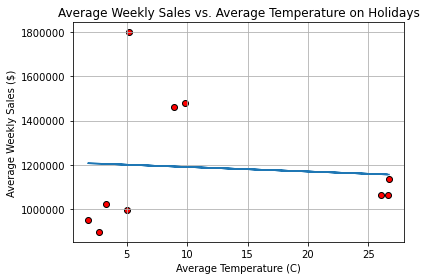

In [41]:
# SCATTERPLOT: AVERAGE WEEKLY SALES vs. AVERAGE TEMPERATURE ON HOLIDAYS
ave_temperature=merge["Temperature C"]
weekly_sales=merge["Weekly_Sales"]

# Add labels:
plt.title("Average Weekly Sales vs. Average Temperature on Holidays")
plt.xlabel("Average Temperature (C)")
plt.ylabel("Average Weekly Sales ($)")
plt.grid()
plt.scatter(ave_temperature, weekly_sales, marker="o", color = "red",edgecolors="black")
plt.ticklabel_format(style='plain')

# Create linear regression equation:
slope, intercept, r_value, p_value, std_err = st.linregress(ave_temperature, weekly_sales)
best_fit = slope*ave_temperature+intercept
plt.plot(ave_temperature,best_fit)
plt.tight_layout()

# Export as png:
plt.savefig("Figures/Temperature/fig31.png")

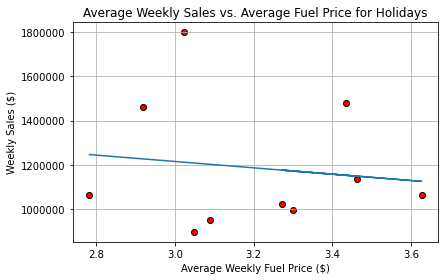

In [42]:
# SCATTERPLOT: AVERAGE WEEKLY SALES vs. AVERAGE FUEL PRICE FOR HOLIDAYS
ave_fuel_price = merged["Fuel_Price"]
weekly_sales=merged["Weekly_Sales"]

# Add labels and format:
plt.title("Average Weekly Sales vs. Average Fuel Price for Holidays")
plt.xlabel("Average Weekly Fuel Price ($)")
plt.ylabel("Weekly Sales ($)")
plt.tight_layout()
plt.grid()

plt.scatter(ave_fuel_price, weekly_sales, marker="o", color="red",edgecolors="black")
plt.ticklabel_format(style='plain')

# Create linear regression equation:
slope, intercept, r_value, p_value, std_err = st.linregress(ave_fuel_price, weekly_sales)
best_fit = slope*ave_fuel_price+intercept
plt.plot(ave_fuel_price,best_fit)

# Export as png:
plt.savefig("Figures/Fuel Price/fig32.png")

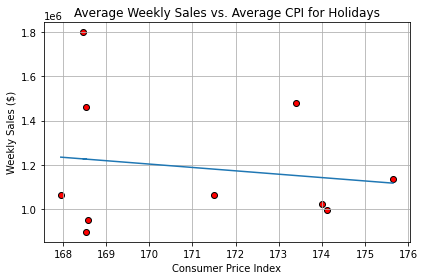

In [43]:
# SCATTERPLOT: AVERAGE WEEKLY SALES vs. AVERAGE CPI FOR HOLIDAYS
weekly_sales = merger["Weekly_Sales"]
cpi = merger["CPI"]

# Add labels and format:
plt.title("Average Weekly Sales vs. Average CPI for Holidays")
plt.ylabel("Weekly Sales ($)")
plt.xlabel("Consumer Price Index")
plt.tight_layout()

plt.scatter(cpi,weekly_sales,marker="o", color="red",edgecolor="black")

# Create linear regression equations:
slope, intercept, r_value, p_value, std_err = st.linregress(cpi, weekly_sales)
best_fit = slope*cpi+intercept
plt.plot(cpi,best_fit)
plt.grid()

# Export as png:
plt.savefig("Figures/CPI/fig33.png")

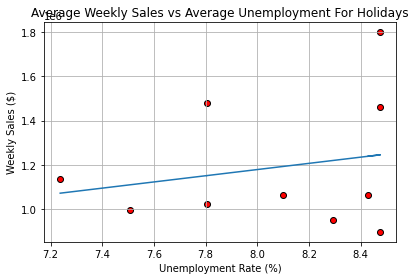

In [44]:
# SCATTERPLOT: AVERAGE UNEMPLOYMENT vs. AVERAGE WEEKLY SALES FOR HOLIDAYS
weekly_sales = bydate["Weekly_Sales"]
un_rate = bydate["Unemployment"]

# Add labels:
plt.title("Average Weekly Sales vs Average Unemployment For Holidays")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Weekly Sales ($)")
plt.scatter(un_rate, weekly_sales, marker="o", color="red", edgecolor="black")

# Create linear regression equations:
slope, intercept, r_value, p_value, std_err = st.linregress(un_rate, weekly_sales)
best_fit = slope*un_rate+intercept
plt.plot(un_rate,best_fit)

# Format:
plt.grid()
plt.tight_layout()

# Export as png:
plt.savefig("Figures/Unemployment/fig34.png")

In [45]:
# Group by Date and average variables:
datea = data.groupby("Date")["Weekly_Sales"].mean()
sales=pd.DataFrame(datea)
tempa = data.groupby("Date")["Temperature C"].mean()
temp=pd.DataFrame(tempa)
fuela = data.groupby("Date")["Fuel_Price"].mean()
cpia = data.groupby("Date")["CPI"].mean()
ratea = data.groupby("Date")["Unemployment"].mean()

# Merge dataframe:
merge = sales.merge(tempa,on="Date")
merged = merge.merge(fuela,on="Date")
merger = merged.merge(cpia,on="Date")
bydate = merger.merge(ratea,on="Date")

In [46]:
# Get summary of dataframe:
isholi = data.groupby("Date")["Is Holiday"].describe()
isholid = pd.DataFrame(isholi)

# Merge dataframe:
datas = bydate.merge(isholid,on="Date")

# Rename column:
datas.rename(columns={"top":"Is Holiday"},inplace=True)

<Figure size 432x288 with 0 Axes>

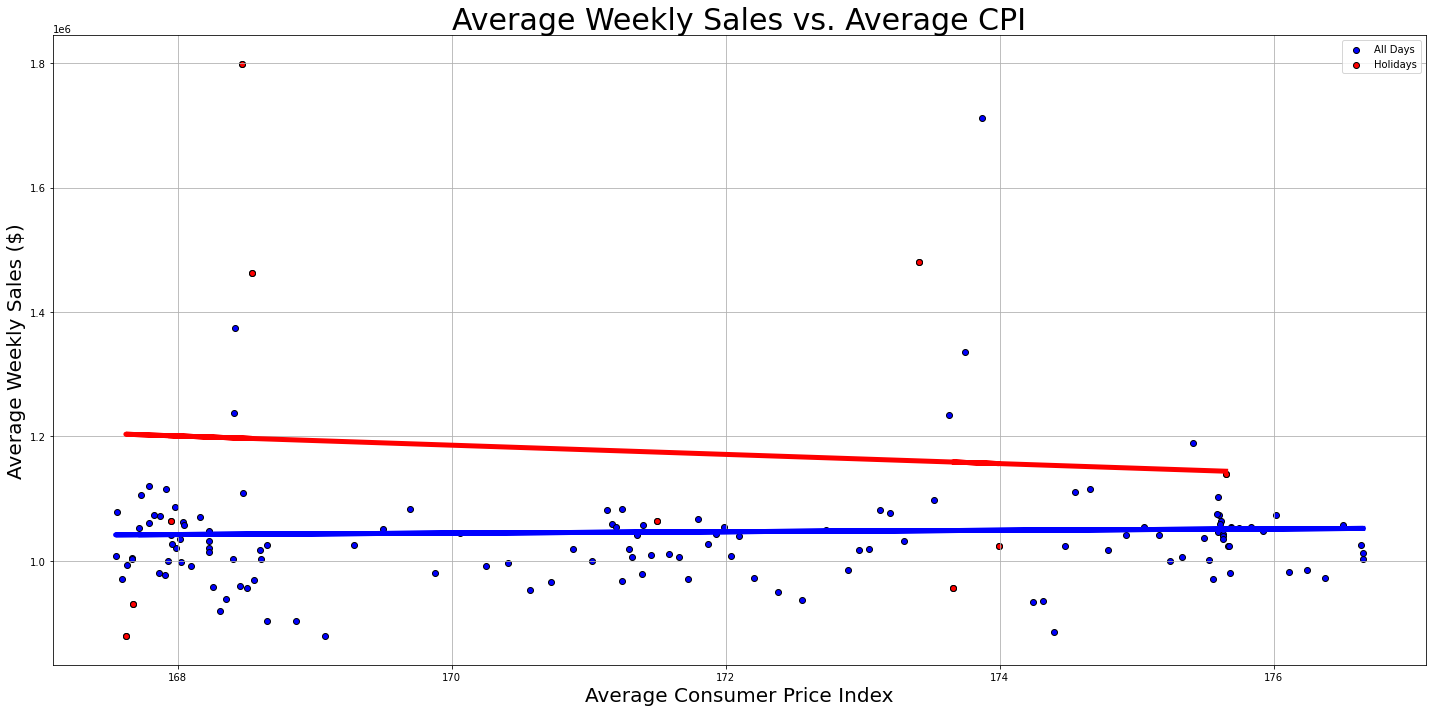

In [47]:
# SCATTERPLOT: AVERAGE WEEKLY SALES vs. AVERAGE CPI FOR HOLIDAY AND NONHOLIDAY
cpi1 = datas["CPI"]
weekly_sales1 = datas["Weekly_Sales"]
weekly_sales2 = datas.loc[datas["Is Holiday"] != "No Holiday"]["Weekly_Sales"]
cpi2 = datas.loc[datas["Is Holiday"] != "No Holiday"]["CPI"]

# Format:
plt.tight_layout()
plt.figure(figsize=(20,10)) 
plt.grid()

# Add labels:
plt.title("Average Weekly Sales vs. Average CPI",fontsize = 30)
plt.xlabel("Average Consumer Price Index",fontsize=20)
plt.ylabel("Average Weekly Sales ($)",fontsize = 20)

plt.scatter(cpi1, weekly_sales1, marker="o",color = "blue",edgecolors="black",label="All Days")
plt.scatter(cpi2, weekly_sales2, marker="o", color = "red",edgecolors="black",label = "Holidays")

# Create linear regression equation:
slope2, intercept2, r_value2, p_value2, std_err2 = st.linregress(cpi2, weekly_sales2)
best_fit2 = slope2*cpi2+intercept2
slope1, intercept1, r_value1, p_value1, std_err1 = st.linregress(cpi1, weekly_sales1)
best_fit1 = slope1*cpi1+intercept1
plt.plot(cpi1,best_fit1,linewidth=5,c="blue")
plt.plot(cpi2,best_fit2,linewidth=5,c="red")
plt.legend()
plt.tight_layout()

# Export as png:
plt.savefig("Figures/CPI/fig35.png")

<Figure size 432x288 with 0 Axes>

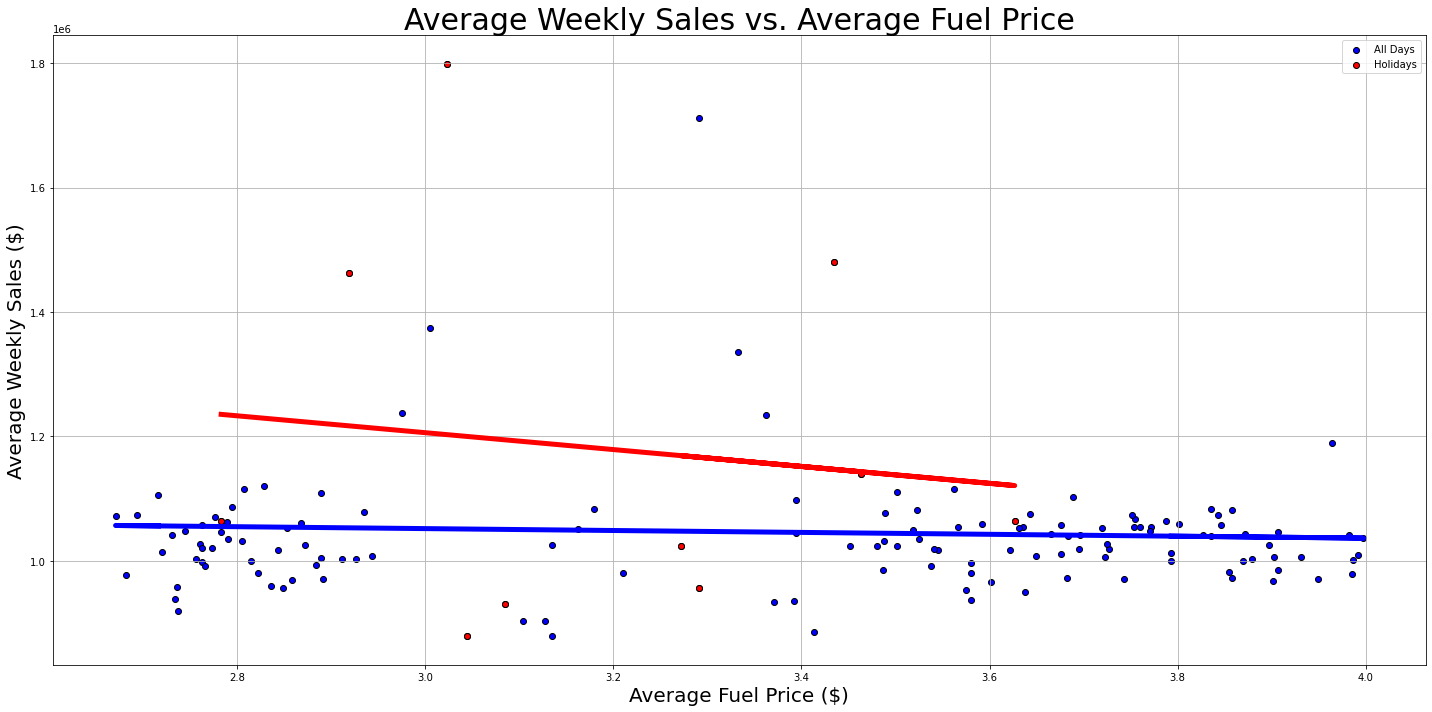

In [48]:
# SCATTERPLOT: AVERAGE WEEKLY SALES vs. AVERAGE FUEL PRICE FOR HOLIDAY AND NONHOLIDAY
cpi1 = datas["Fuel_Price"]
weekly_sales1 = datas["Weekly_Sales"]
weekly_sales2 = datas.loc[datas["Is Holiday"] != "No Holiday"]["Weekly_Sales"]
cpi2 = datas.loc[datas["Is Holiday"] != "No Holiday"]["Fuel_Price"]

# Format:
plt.tight_layout()
plt.figure(figsize=(20,10)) 
plt.grid()

# Add title and labels:
plt.title("Average Weekly Sales vs. Average Fuel Price",fontsize = 30)
plt.xlabel("Average Fuel Price ($)",fontsize=20)
plt.ylabel("Average Weekly Sales ($)",fontsize = 20)

plt.scatter(cpi1, weekly_sales1, marker="o",color = "blue",edgecolors="black",label="All Days")
plt.scatter(cpi2, weekly_sales2, marker="o", color = "red",edgecolors="black",label = "Holidays")

# Create linear regression equation:
slope2, intercept2, r_value2, p_value2, std_err2 = st.linregress(cpi2, weekly_sales2)
best_fit2 = slope2*cpi2+intercept2
slope1, intercept1, r_value1, p_value1, std_err1 = st.linregress(cpi1, weekly_sales1)
best_fit1 = slope1*cpi1+intercept1

# Add equation:
plt.plot(cpi1,best_fit1,linewidth=5,c="blue")
plt.plot(cpi2,best_fit2,linewidth=5,c="red")
plt.legend()
plt.tight_layout()

# Export as png:
plt.savefig("Figures/Fuel Price/fig36.png")

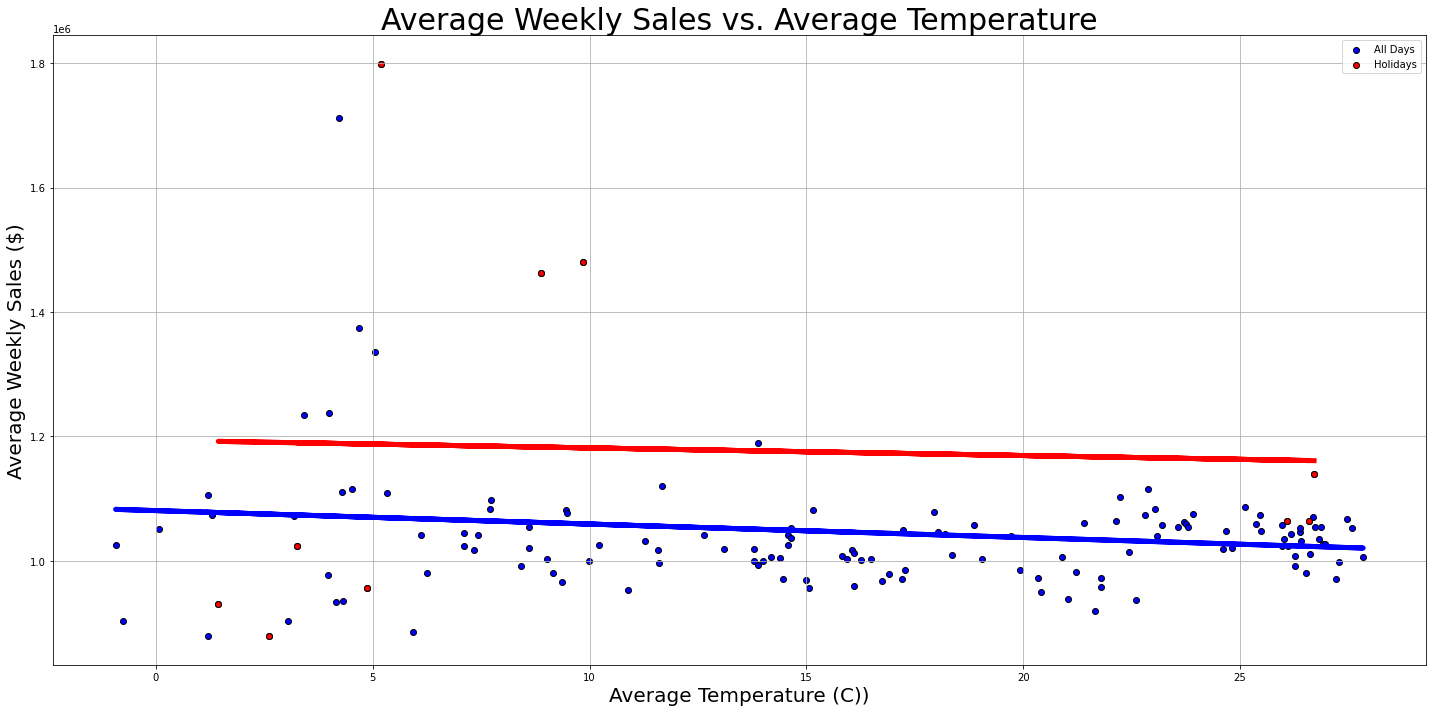

In [49]:
# SCATTERPLOT: AVERAGE WEEKLY SALES vs. AVERAGE TEMPERATURE FOR HOLIDAY AND NONHOLIDAY
cpi1 = datas["Temperature C"]
weekly_sales1 = datas["Weekly_Sales"]
weekly_sales2 = datas.loc[datas["Is Holiday"] != "No Holiday"]["Weekly_Sales"]
cpi2 = datas.loc[datas["Is Holiday"] != "No Holiday"]["Temperature C"]

# Format and add labels:
plt.figure(figsize=(20,10))
plt.grid()
plt.title("Average Weekly Sales vs. Average Temperature",fontsize = 30)
plt.xlabel("Average Temperature (C))",fontsize=20)
plt.ylabel("Average Weekly Sales ($)",fontsize = 20)

plt.scatter(cpi1, weekly_sales1, marker="o",color = "blue",edgecolors="black",label="All Days")
plt.scatter(cpi2, weekly_sales2, marker="o", color = "red",edgecolors="black",label = "Holidays")

# Create linear regression equation:
slope2, intercept2, r_value2, p_value2, std_err2 = st.linregress(cpi2, weekly_sales2)
best_fit2 = slope2*cpi2+intercept2
slope1, intercept1, r_value1, p_value1, std_err1 = st.linregress(cpi1, weekly_sales1)
best_fit1 = slope1*cpi1+intercept1

# Add equation:
plt.plot(cpi1,best_fit1,linewidth=5,c="blue")
plt.plot(cpi2,best_fit2,linewidth=5,c="red")
plt.legend()
plt.tight_layout()

# Export as png:
plt.savefig("Figures/Temperature/fig37.png")

<Figure size 432x288 with 0 Axes>

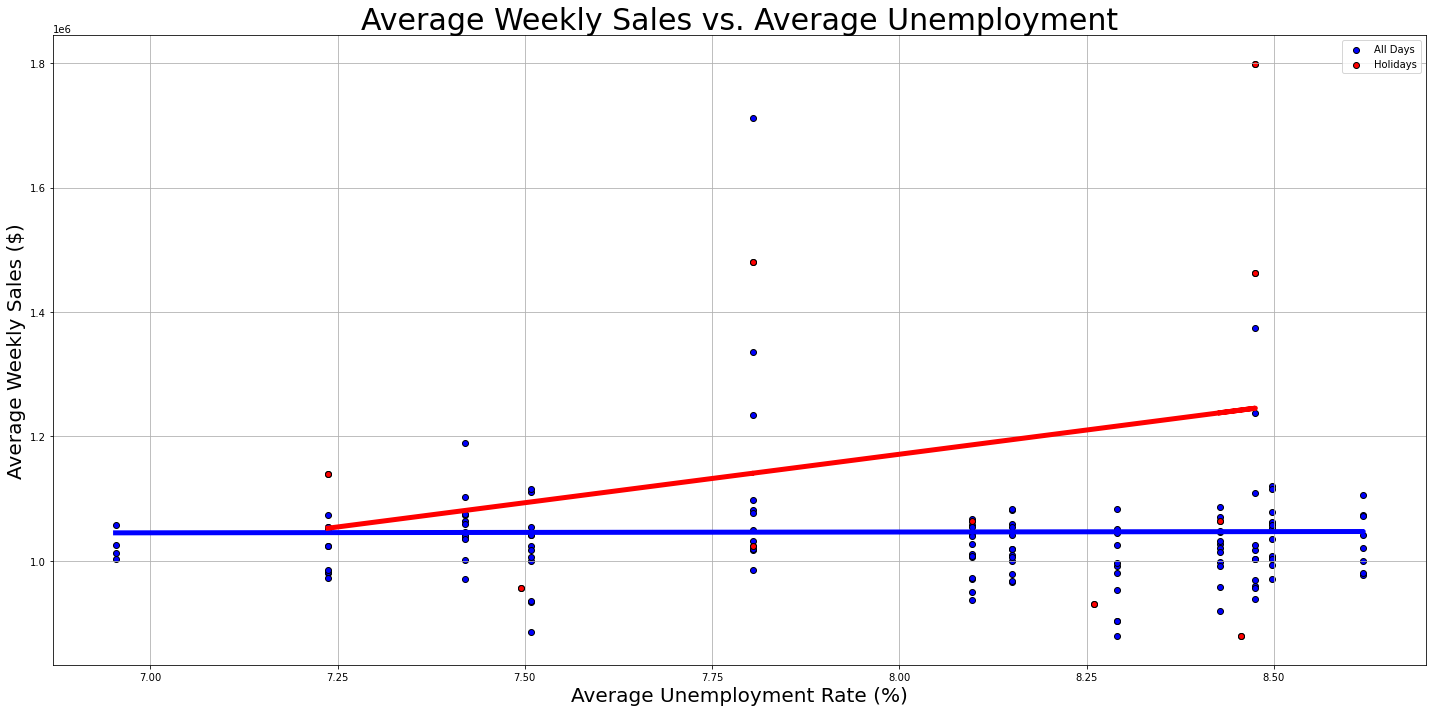

In [50]:
# SCATTERPLOT: AVERAGE WEEKLY SALES vs. AVERAGE UNEMPLOYMENT RATE FOR HOLIDAY AND NONHOLIDAY
cpi1 = datas["Unemployment"]
weekly_sales1 = datas["Weekly_Sales"]
weekly_sales2 = datas.loc[datas["Is Holiday"] != "No Holiday"]["Weekly_Sales"]
cpi2 = datas.loc[datas["Is Holiday"] != "No Holiday"]["Unemployment"]

# Format:
plt.tight_layout()
plt.figure(figsize=(20,10)) 
plt.grid()

# Add labels:
plt.title("Average Weekly Sales vs. Average Unemployment",fontsize = 30)
plt.xlabel("Average Unemployment Rate (%)",fontsize=20)
plt.ylabel("Average Weekly Sales ($)",fontsize = 20)

plt.scatter(cpi1, weekly_sales1, marker="o",color = "blue",edgecolors="black",label="All Days")
plt.scatter(cpi2, weekly_sales2, marker="o", color = "red",edgecolors="black",label = "Holidays")

# Create linear regression equation:
slope2, intercept2, r_value2, p_value2, std_err2 = st.linregress(cpi2, weekly_sales2)
best_fit2 = slope2*cpi2+intercept2
slope1, intercept1, r_value1, p_value1, std_err1 = st.linregress(cpi1, weekly_sales1)
best_fit1 = slope1*cpi1+intercept1

# Add equation:
plt.plot(cpi1,best_fit1,linewidth=5,c="blue")
plt.plot(cpi2,best_fit2,linewidth=5,c="red")
plt.legend()
plt.tight_layout()

# Export as png:
plt.savefig("Figures/Unemployment/fig38.png")